In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [56]:
df = pd.read_csv("diabetes.csv")

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
len(df[df["Outcome"]==1]),len(df[df["Outcome"]==0]) #Normalize

(268, 500)

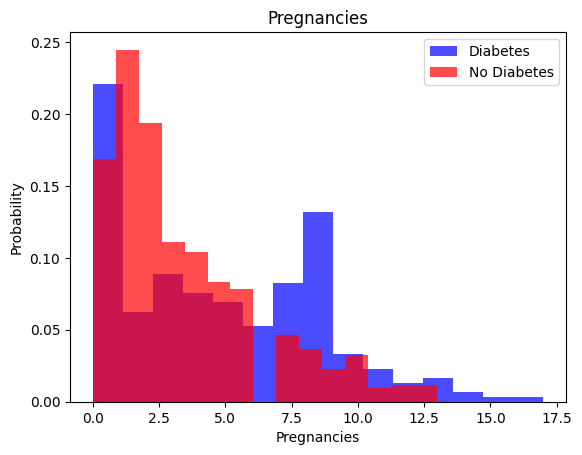

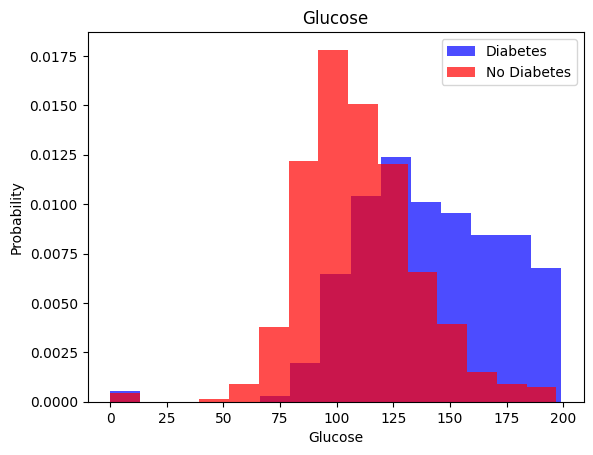

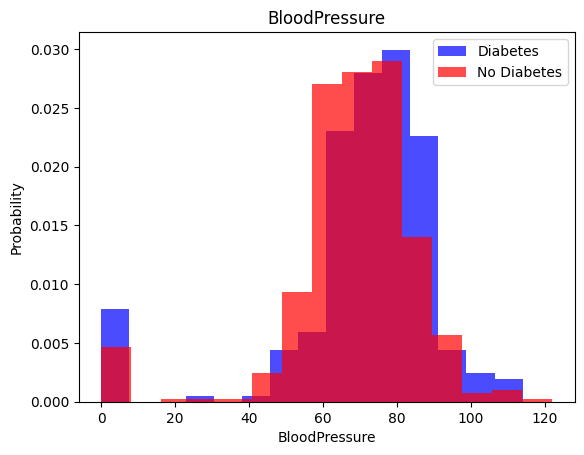

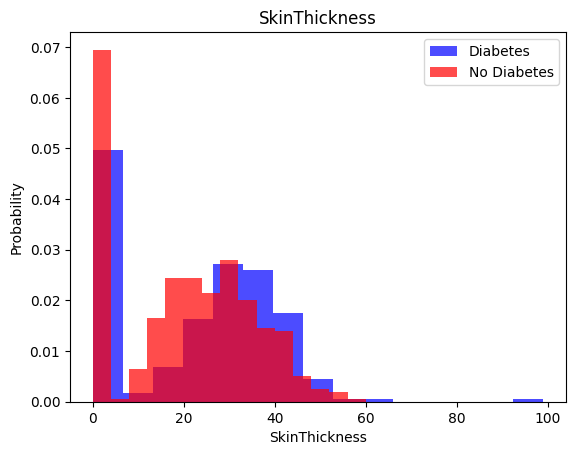

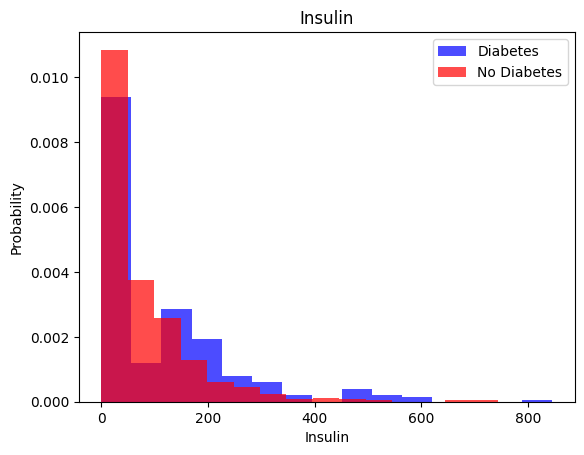

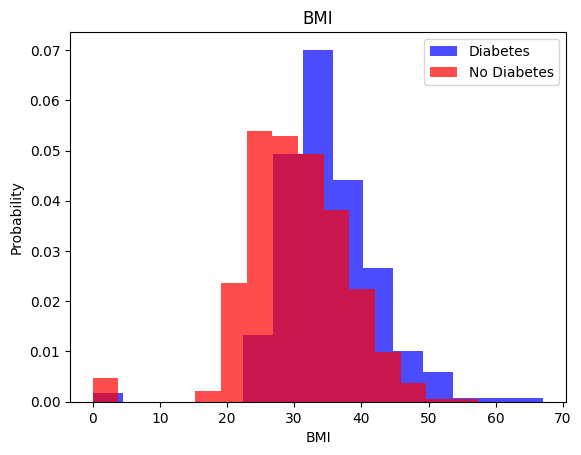

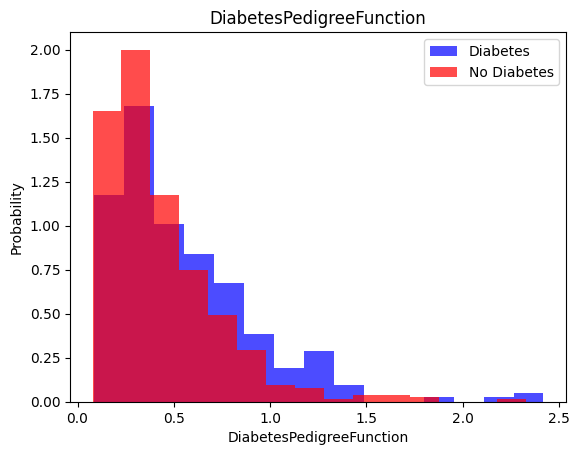

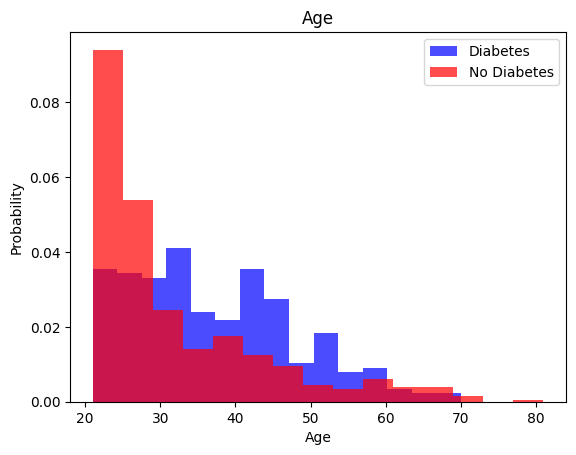

In [59]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"] == 1][label], color = 'blue', label= "Diabetes",alpha = 0.7,density = True, bins=15)
  plt.hist(df[df["Outcome"] == 0][label], color = 'red', label= "No Diabetes",alpha = 0.7,density = True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [60]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
x.shape, y.shape

((768, 8), (768,))

In [63]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [64]:
from sklearn.model_selection import train_test_split

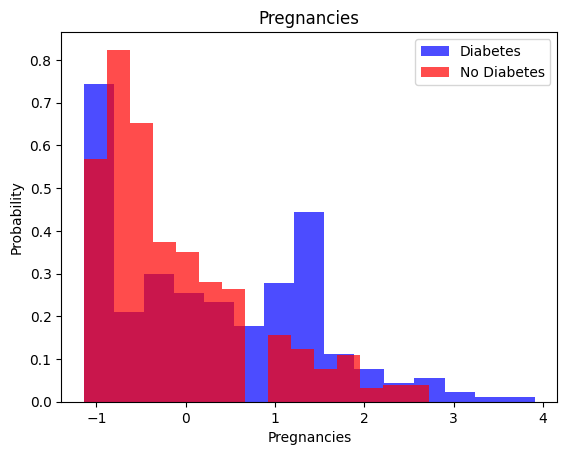

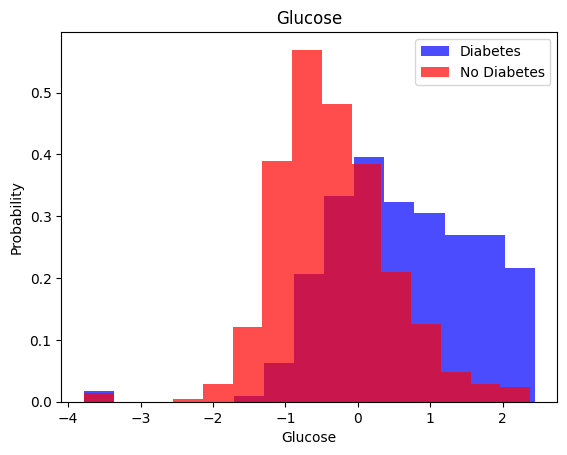

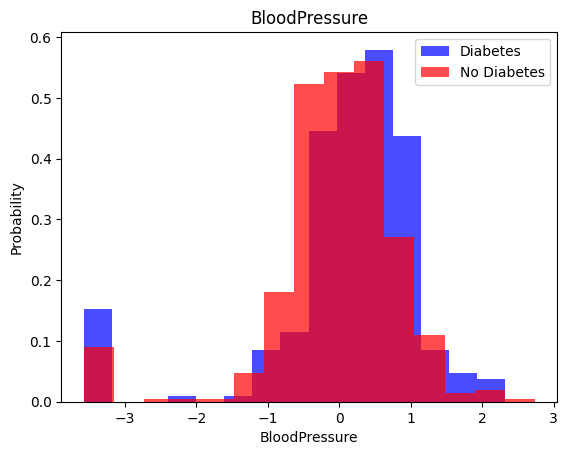

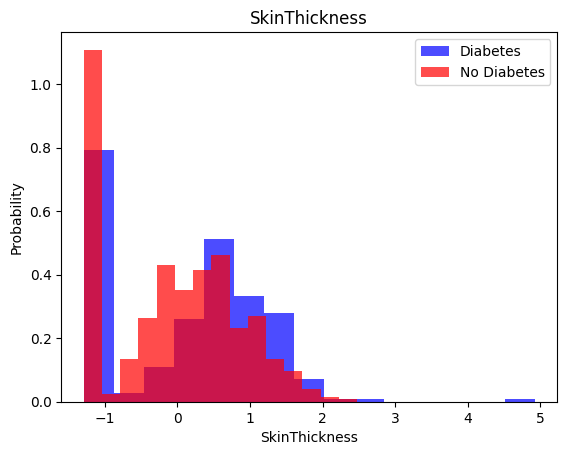

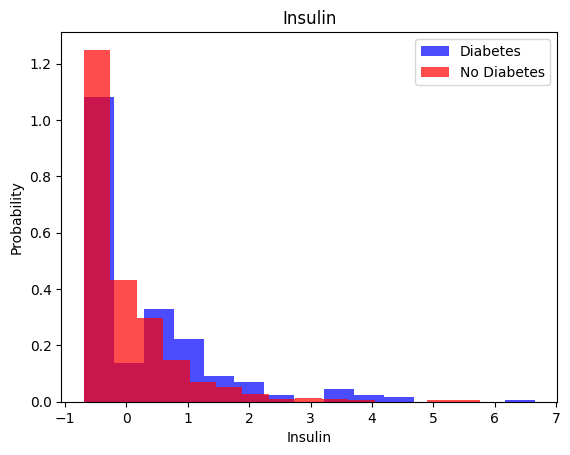

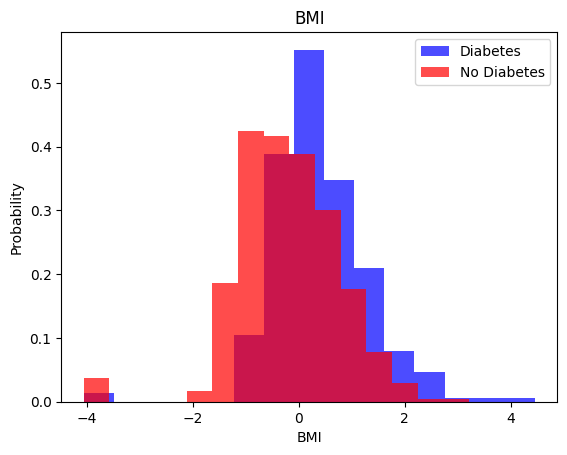

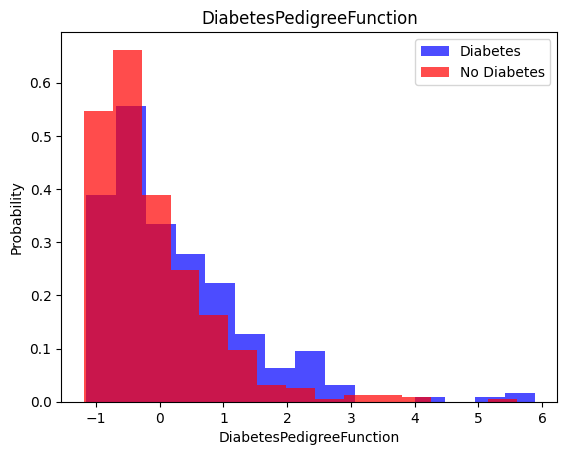

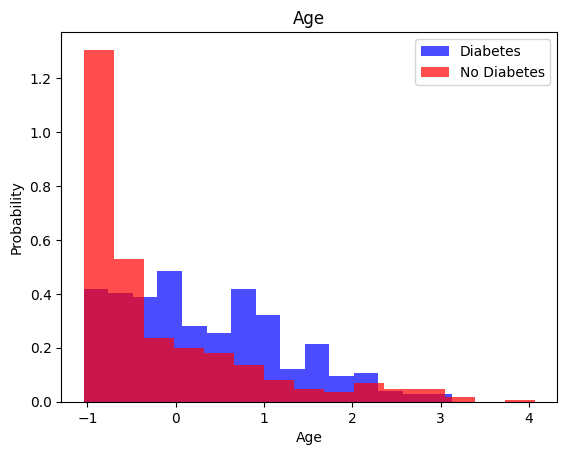

In [65]:
for i in range(len(df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"] == 1][label], color = 'blue', label= "Diabetes",alpha = 0.7,density = True, bins=15)
  plt.hist(transformed_df[transformed_df["Outcome"] == 0][label], color = 'red', label= "No Diabetes",alpha = 0.7,density = True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [66]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

In [67]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler

In [68]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [69]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [70]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.4,random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [71]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(16,activation= "relu"),
                              tf.keras.layers.Dense(16,activation= "relu"),
                              tf.keras.layers.Dense(1,activation= "sigmoid")

 ])

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [73]:
model.evaluate(x_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5158 - loss: 0.7204   


[0.7153851389884949, 0.528333306312561]

In [74]:
model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6191 - loss: 0.6689 - val_accuracy: 0.7100 - val_loss: 0.5957
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7376 - loss: 0.5481 - val_accuracy: 0.7400 - val_loss: 0.5154
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7376 - loss: 0.5036 - val_accuracy: 0.7800 - val_loss: 0.4785
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7790 - loss: 0.4743 - val_accuracy: 0.7800 - val_loss: 0.4650
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7557 - loss: 0.4863 - val_accuracy: 0.7700 - val_loss: 0.4586
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7563 - loss: 0.4827 - val_accuracy: 0.7650 - val_loss: 0.4494
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7814 - loss: 0.4434 - val_accuracy: 0.7550 - val_loss: 0.4369
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7769 - loss: 0.4535 - val_accuracy: 0.7650 - val

In [75]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8015 - loss: 0.4305 


[0.48581650853157043, 0.7699999809265137]